In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt

In [2]:
import time as time

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## A new Tellprime Function ( 2 times Faster than Previous One)

In [4]:
@nb.njit
def tellprime(z):
    if z == 1:
        return False
    elif z in [2,3]:
        return True
    elif z%2==0:
        return False
    elif z%3==0:
        return False
    else:
        for i in range(4, int(z**(.5))+1):
            if i%6 in [1,5]:
                if z%i==0:
                    return False
        return True

In [5]:
%time tellprime(16765962748063)

Wall time: 493 ms


True

## Prime Factors

In [6]:
@nb.njit
def Prime_Factors(num):
    arr = np.array([nb.int32(1)])
    for i in range(1, int(num**(0.5))+1):
        if num%i==0:
            if tellprime(i):
                arr = np.append(arr,[int32(i)])
            if tellprime(int(num/i)):
                arr = np.append(arr,[int32(num/i)])
    return arr[1:]

In [7]:
%time Prime_Factors(10006700)

Wall time: 1 s


array([  2,   5,  11, 827])

## Prime Factorisation

In [8]:
arr = np.array([],dtype='int32')
def prime_factorisation(num):
    global arr
    for i in range(2, num+1):
        if num%i == 0:
            arr = np.append(arr,[i])
            prime_factorisation(int(num/i))
            return arr

In [9]:
%time prime_factorisation(9999999)

Wall time: 1 ms


array([   3,    3,  239, 4649])

## Euler Totient Function

### Version1 

In [10]:
def phi1(num):
    primeFactorsOfNum = Prime_Factors(num)
    coPrimes = range(1,num+1)
    for primeFactor in primeFactorsOfNum:
        coPrimes = np.array(list(filter(lambda x: x%primeFactor != 0,coPrimes)))
    return coPrimes.size


In [11]:
%time phi1(9999999)

Wall time: 15.8 s


6637344

In [12]:
phi1(12)

4

### Version 2

In [13]:
@nb.vectorize([nb.int32(nb.int32, nb.int32)])
def local(x,div):
    if x%div==0:
        return 0
    return x

In [14]:
local(range(3),3)

array([0, 1, 2])

In [15]:
def phi2(num):
    primeFactorsOfNum = Prime_Factors(num)
    coPrimes = range(1,num)
    for primeFactor in primeFactorsOfNum:
        coPrimes = local(coPrimes, primeFactor)
    return coPrimes[coPrimes>0].size

In [16]:
%time phi2(9999999)

Wall time: 2.09 s


6637344

### Version 3

In [17]:
@nb.njit
def phi3(num):
    primeFactorsOfNum = Prime_Factors(num)
    count = 1
    for e in range(2, num):
        z = True
        for primefactor in primeFactorsOfNum:
            if e%primefactor==0:
                z = False
                break
        if z:
            count += 1
            
    return count

In [18]:
%time phi3(9999999)

Wall time: 538 ms


6637344

### Version 4

In [19]:
#using formula for totient function for any number

In [20]:
@nb.njit
def product(arr):
    ans = 1
    for element in arr:
        ans = ans * element
    return ans

In [21]:
#for example
product(np.array([1,2,3,4]))

24

In [22]:
@nb.njit
def phi(num):
    primeFactors = Prime_Factors(num)
    return int((num*product(primeFactors-1))/product(primeFactors))

In [23]:
%time phi(9999999)

Wall time: 540 ms


6637344

In [29]:
%time phi(1319381)

Wall time: 0 ns


1130892

In [39]:
%time phi(8319823)

Wall time: 0 ns


8313928

## Project Euler Problem 70

In [26]:
def compare(num1, num2):
    num1 = str(num1)
    num2 = str(num2)
    if len(num1)==len(num2):
        num1 = list(num1)
        num2 = list(num2)
        for digit in num1:
            if digit in num2:
                num2.remove(digit)
                continue
            else:
                return False
        return True
    return False
            

In [32]:
%time compare(9999999, phi(9999999))

Wall time: 0 ns


False

In [37]:
start = time.time()
num_over_phi_num = 2
num = 2
for i in range(3,int(1e7)):
    f = phi(i)
    if compare(i,f):
        z = i/f
        if z < num_over_phi_num:
            num_over_phi_num = z
            num = i
end = time.time()

In [38]:
print(num)
print(num_over_phi_num)
print(end-start)

8319823
1.0007090511248113
415.69887375831604


## Plotting Graph Just For Fun

In [102]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [96]:
x = np.arange(2,int(1e2))
y = np.array(list(map(lambda x: x/phi3(x), x)))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


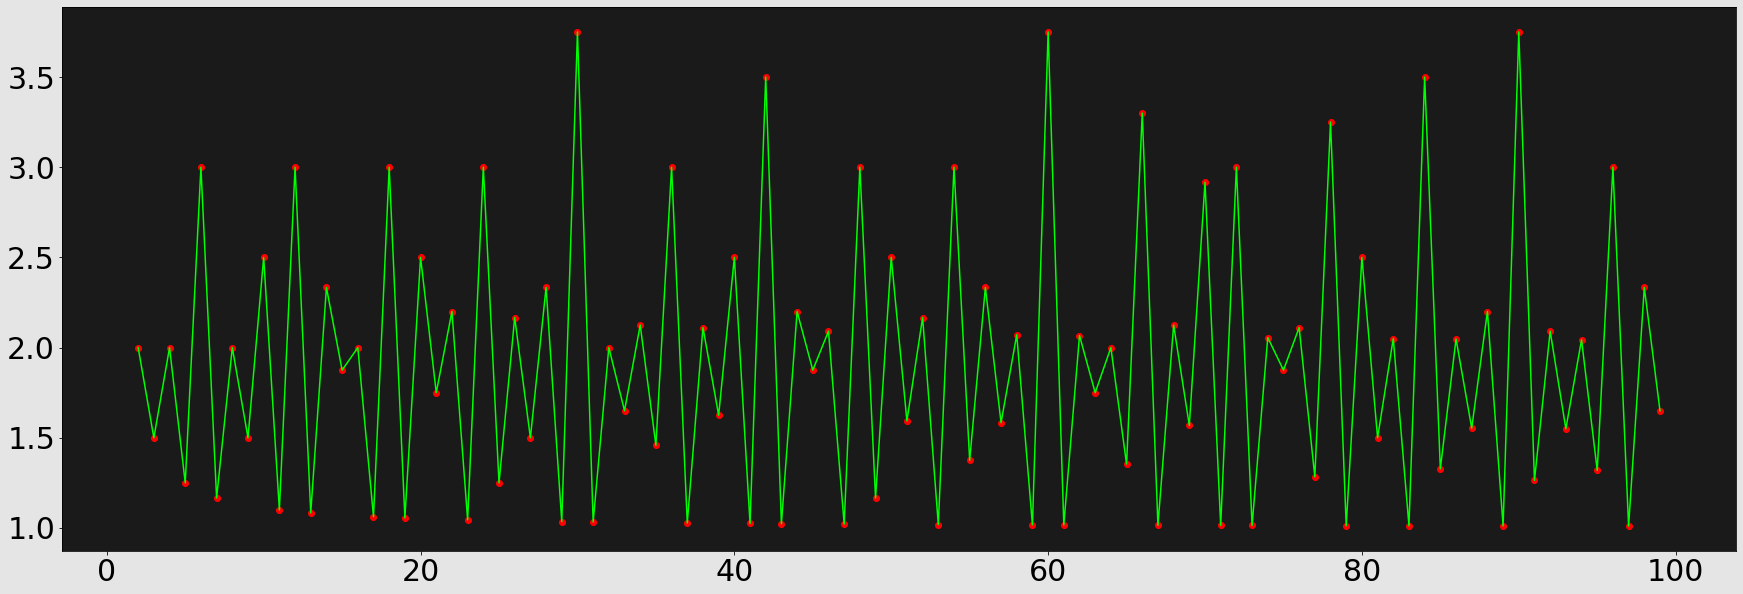

In [149]:
fig = plt.figure(figsize=(30,10))
fig.patch.set_facecolor((0,0,0,.1))
mpl.rcParams.update({'font.size': 30})
plt.scatter(x, y, c=(1,0,0,1))
plt.plot(x, y, c=(0,1,0,1))
plt.savefig("projectEuler70.pdf")
ax = plt.gca()
ax.set_facecolor((0.1,0.1,0.1,1))
plt.show()